## Event Detection 

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Daten laden

In [2]:
predictions = pd.read_parquet('./data/predicted_series_mlp_new_full.parquet')

In [3]:
predictions['correct_prediction'] = (predictions['awake'] == predictions['prediction_class']).replace({True: 1, False: 0})

## Daten visualisieren

In [4]:
sample = predictions[50000:100000]

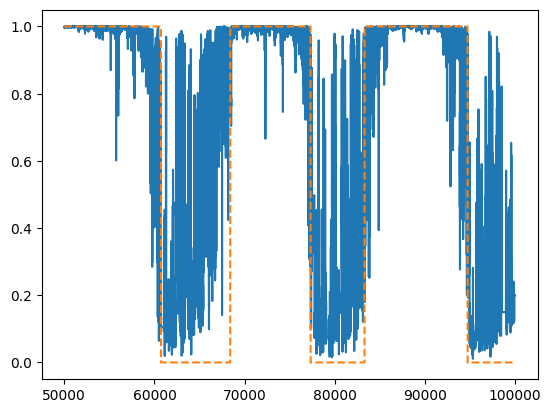

In [5]:
plt.plot(sample['step'], sample['prediction_confidence_1'])
plt.plot(sample['step'], sample['awake'], linestyle='dashed')
plt.show()

## Accuracy pro Serie

In [6]:
series = predictions.series_id.unique()

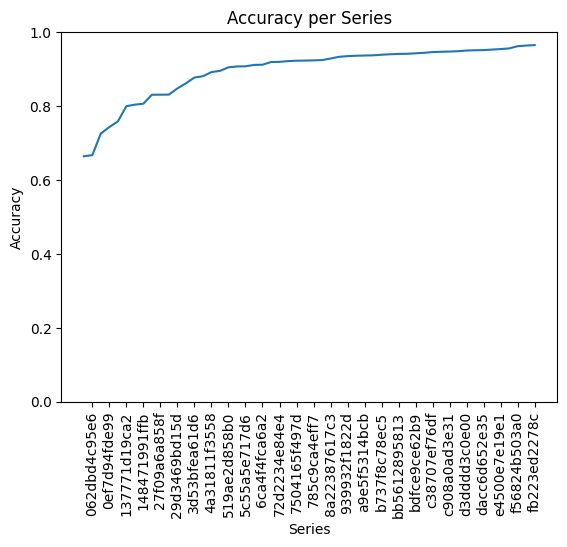

In [7]:
ax = predictions.groupby('series_id')['correct_prediction'].mean().sort_values().plot(
    ylim=(0, 1), title='Accuracy per Series'
)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Series")
ax.set_xticks(ticks=[*range(1, len(series), 2)], labels=series[::2], rotation=90)

fig = ax.get_figure()
fig.savefig("accuracy-per-series.png", bbox_inches="tight")

In [8]:
predictions.groupby('series_id')['correct_prediction'].mean().sort_values()

series_id
c107b5789660    0.664081
5aad18e7ce64    0.667208
cf13ed7e457a    0.725617
13b4d6a01d27    0.743123
703b5efa9bc1    0.758364
a596ad0b82aa    0.799623
e4500e7e19e1    0.803776
aed3850f65f0    0.806211
7476c0bd18d2    0.830546
b7fc34995d0f    0.830741
3d53bfea61d6    0.830889
148471991ffb    0.847722
27f09a6a858f    0.861524
4ac356361be9    0.877118
137771d19ca2    0.880718
a9e5f5314bcb    0.891879
0ef7d94fde99    0.895169
e586cbfa7762    0.904795
fb223ed2278c    0.907122
0cd1e3d0ed95    0.907481
7504165f497d    0.911226
bccf2f2819f8    0.911806
3664fe9233f9    0.919009
3df0da2e5966    0.919550
e30cb792a2bc    0.921518
10f8bc1f7b07    0.922681
519ae2d858b0    0.922974
5c55a5e717d6    0.923546
c38707ef76df    0.924355
7fd4284b7ee8    0.928528
752900afe3a6    0.933198
4a31811f3558    0.935047
bdfce9ce62b9    0.936101
939932f1822d    0.936655
188d4b7cd28b    0.937241
062dbd4c95e6    0.938822
bb5612895813    0.940067
785c9ca4eff7    0.941097
c68260cc9e8f    0.941376
f88e18cb4100   

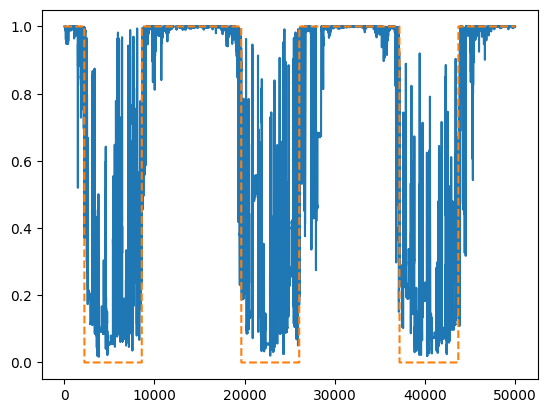

In [9]:
sample = predictions[predictions.series_id == 'd5e47b94477e']

sample = sample[0:50000]

plt.plot(sample['step'], sample['prediction_confidence_1'])
plt.plot(sample['step'], sample['awake'], linestyle='dashed')
plt.show()